In [3]:
import numpy as np
import pandas as pd

users_num = 10000

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['user_mean'] = np.random.lognormal(mean=np.log(1000), sigma=0.5, size=users_num)
df['cost_before'] = np.abs(
    df['user_mean'] + np.random.normal(0, 100, size=users_num)
)
df['cost'] = np.abs(
    df['user_mean'] + np.random.normal(50, 100, size=users_num)
)

In [7]:
teta = np.cov(df['cost_before'], df['cost'])[0, 1] / np.var(df['cost_before'])
df['cost_cuped'] = df['cost'] - teta * (df['cost_before'] - df['cost_before'].mean())

In [13]:
df['cost'].var() / df['cost_cuped'].var()

18.605808616591027

In [14]:
np.random.seed(6)

users_num = 10000
mean_user_ctr = 0.2
beta = 20
alpha = mean_user_ctr * beta / (1 - mean_user_ctr)

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['base_user_ctr'] = np.random.beta(alpha, beta, size=users_num)
df['views'] = np.random.lognormal(mean=1, sigma=1, size=users_num).astype(int) + 1
df['clicks'] = np.random.binomial(df['views'], df['base_user_ctr'])

In [15]:
df

,user,group,base_user_ctr,views,clicks
0,0,False,0.322688,2,2
1,1,True,0.182517,6,1
2,2,False,0.260975,6,3
3,3,True,0.260439,2,0
4,4,True,0.332355,1,1
...,...,...,...,...,...
9995,9995,False,0.216499,25,5
9996,9996,False,0.259650,2,1
9997,9997,True,0.268912,2,0
9998,9998,True,0.147879,4,0


<Axes: xlabel='bucket', ylabel='Count'>

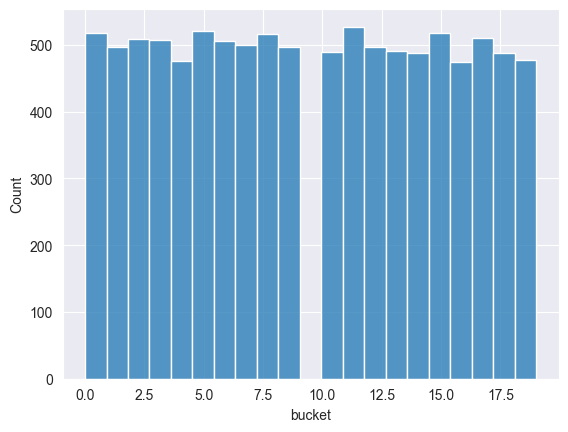

In [33]:
import hashlib
import seaborn as sns

df['bucket'] = df['user'].apply(
    lambda x: int(hashlib.md5((str(x) + 'my_salt').encode()).hexdigest(), 16) % 20

)

sns.histplot(df.bucket)

In [39]:
df['user_ctv'] = df['clicks'] / df['views']

In [40]:
df.groupby('bucket').agg({'user_ctv': 'mean'})

,user_ctv
bucket,
0,0.208457
1,0.176787
2,0.177572
3,0.204305
4,0.194390
5,0.192300
6,0.176697
7,0.202417
8,0.195597


In [53]:
ctv_group_bucket = df.groupby('bucket')[['clicks', 'views']].apply(lambda x: x['clicks'].sum() / x['views'].sum())

ctv_user_bucket = df.groupby('bucket').agg({'user_ctv': 'mean'})

In [67]:
ctv_group_bucket.std(), ctv_user_bucket.std().iloc[0]

(0.0077785860078430505, 0.01105002436591363)